<a href="https://www.kaggle.com/code/dwiahmad/wfp-food-prices-indonesia-time-series-analysis?scriptVersionId=290487108" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# ANALISIS TIME SERIES: SINGLE & DOUBLE EXPONENTIAL SMOOTHING

Dataset: WFP Food Prices Indonesia <br>
Nama : Dwi Ahmad Dzulhijjah<br>

# BAGIAN 1: LOAD DAN EKSPLORASI DATA

## Setting Environment

In [17]:
# Install library yang dibutuhkan (jalankan sekali saja)
!pip install statsmodels openpyxl

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ===================================================================

# ===================================================================

print("="*70)
print("ANALISIS TIME SERIES - WFP FOOD PRICES INDONESIA")
print("="*70)

ANALISIS TIME SERIES - WFP FOOD PRICES INDONESIA


## Akuisisi Data

In [20]:
# Atau langsung dari URL
data = "/content/drive/MyDrive/Time Series(Forecasting)/wfp_food_prices_idn.csv"
df = pd.read_csv(data, skiprows=1)

print("\n📊 INFORMASI DATASET")
print("-"*70)
print(f"Jumlah baris: {len(df):,}")
print(f"Jumlah kolom: {len(df.columns)}")
print(f"\nKolom-kolom: {list(df.columns)}")


📊 INFORMASI DATASET
----------------------------------------------------------------------
Jumlah baris: 237,360
Jumlah kolom: 16

Kolom-kolom: ['#date', '#adm1+name', '#adm2+name', '#loc+market+name', '#loc+market+code', '#geo+lat', '#geo+lon', '#item+type', '#item+name', '#item+code', '#item+unit', '#item+price+flag', '#item+price+type', '#currency+code', '#value', '#value+usd']


In [22]:
# Rename kolom untuk menghilangkan prefix '#'
df.columns = df.columns.str.replace('#', '').str.replace('+', '_')

print("\n📊 INFORMASI DATASET")
print("-"*70)
print(f"Jumlah baris: {len(df):,}")
print(f"Jumlah kolom: {len(df.columns)}")
print(f"\nKolom-kolom: {list(df.columns)}")

# Konversi kolom date ke datetime
df['date'] = pd.to_datetime(df['date'])

# Cek periode data
print(f"\nPeriode data: {df['date'].min().strftime('%B %Y')} - {df['date'].max().strftime('%B %Y')}")

# Lihat komoditas yang tersedia
print(f"\n📦 KOMODITAS YANG TERSEDIA:")
print("-"*70)
commodities = df['item_name'].unique()
for i, comm in enumerate(commodities, 1):
    count = len(df[df['item_name'] == comm])
    print(f"{i}. {comm}: {count} observasi")


📊 INFORMASI DATASET
----------------------------------------------------------------------
Jumlah baris: 237,360
Jumlah kolom: 16

Kolom-kolom: ['date', 'adm1_name', 'adm2_name', 'loc_market_name', 'loc_market_code', 'geo_lat', 'geo_lon', 'item_type', 'item_name', 'item_code', 'item_unit', 'item_price_flag', 'item_price_type', 'currency_code', 'value', 'value_usd']

Periode data: January 2007 - May 2024

📦 KOMODITAS YANG TERSEDIA:
----------------------------------------------------------------------
1. Rice: 10796 observasi
2. Wheat flour: 158 observasi
3. Eggs: 8808 observasi
4. Meat (beef): 8437 observasi
5. Meat (chicken, broiler): 9324 observasi
6. Sugar: 9148 observasi
7. Fuel (kerosene): 73 observasi
8. Chili (bird's eye): 9481 observasi
9. Milk (condensed): 88 observasi
10. Oil (vegetable): 9033 observasi
11. Chili (red): 9211 observasi
12. Rice (high quality): 9125 observasi
13. Rice (low quality): 7763 observasi
14. Eggs (broiler): 9156 observasi
15. Meat (beef, first qualit

# BAGIAN 2: PILIH KOMODITAS DAN AGREGASI DATA



🌾 ANALISIS KOMODITAS: RICE
Total observasi (sebelum agregasi): 10796
Total observasi (setelah agregasi bulanan): 170
Periode: January 2007 - May 2024

Statistik Deskriptif Harga (IDR):
count      170.000000
mean     10900.679576
std       2656.859037
min       5941.980000
25%       9383.750000
50%      11519.450670
75%      13093.969260
max      15224.701609
Name: value, dtype: float64


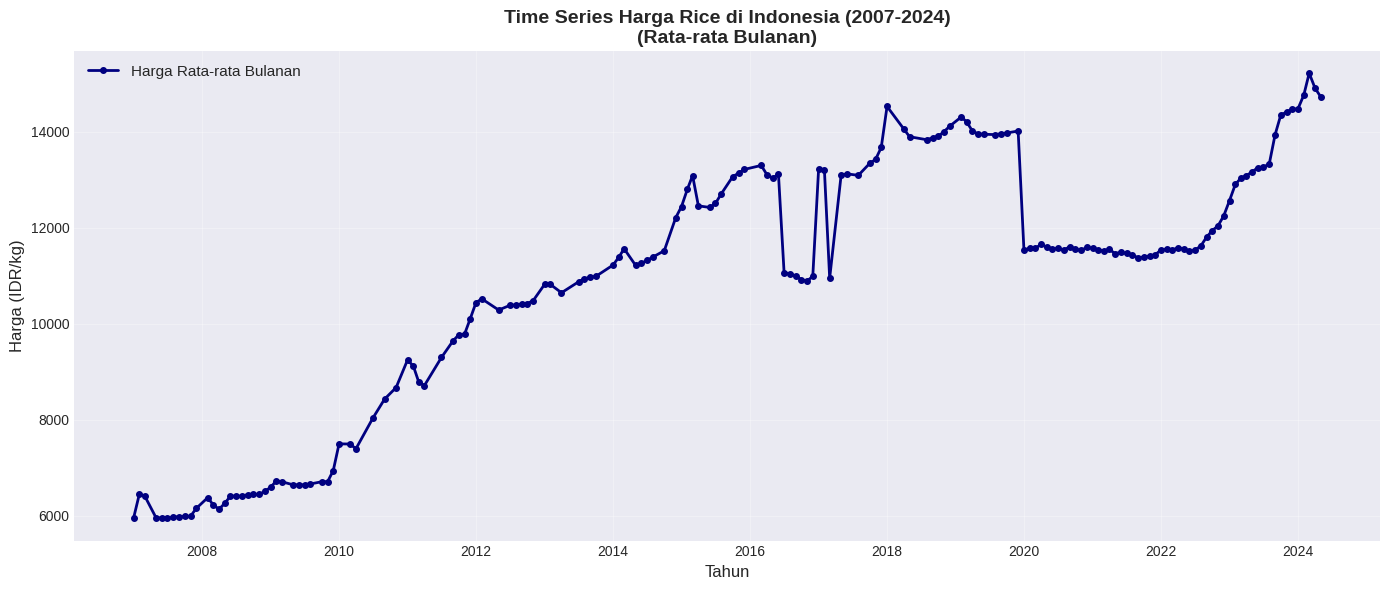

In [23]:
# Kita akan analisis BERAS (Rice) karena paling penting
commodity_name = 'Rice'
df_rice = df[df['item_name'] == commodity_name].copy()

# PENTING: Agregasi data bulanan (rata-rata harga per bulan)
print(f"\n\n🌾 ANALISIS KOMODITAS: {commodity_name.upper()}")
print("="*70)
print(f"Total observasi (sebelum agregasi): {len(df_rice)}")

# Agregasi: ambil rata-rata harga per bulan
df_rice_monthly = df_rice.groupby(df_rice['date'].dt.to_period('M'))['value'].mean()
df_rice_monthly.index = df_rice_monthly.index.to_timestamp()
df_rice_monthly = df_rice_monthly.sort_index()

print(f"Total observasi (setelah agregasi bulanan): {len(df_rice_monthly)}")
print(f"Periode: {df_rice_monthly.index.min().strftime('%B %Y')} - {df_rice_monthly.index.max().strftime('%B %Y')}")
print(f"\nStatistik Deskriptif Harga (IDR):")
print(df_rice_monthly.describe())

# Visualisasi data original
plt.figure(figsize=(14, 6))
plt.plot(df_rice_monthly.index, df_rice_monthly.values, linewidth=2, marker='o',
         markersize=4, label='Harga Rata-rata Bulanan', color='navy')
plt.title(f'Time Series Harga {commodity_name} di Indonesia (2007-2024)\n(Rata-rata Bulanan)',
          fontsize=14, fontweight='bold')
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Harga (IDR/kg)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# BAGIAN 3: SPLIT DATA TRAINING & TESTING

In [24]:
# Split 80% training, 20% testing
train_size = int(len(df_rice_monthly) * 0.8)
train = df_rice_monthly[:train_size]
test = df_rice_monthly[train_size:]

print(f"\n📊 DATA SPLITTING")
print("-"*70)
print(f"Training data: {len(train)} observasi ({train.index.min().strftime('%b %Y')} - {train.index.max().strftime('%b %Y')})")
print(f"Testing data: {len(test)} observasi ({test.index.min().strftime('%b %Y')} - {test.index.max().strftime('%b %Y')})")



📊 DATA SPLITTING
----------------------------------------------------------------------
Training data: 136 observasi (Jan 2007 - Jul 2021)
Testing data: 34 observasi (Aug 2021 - May 2024)


# BAGIAN 4: SINGLE EXPONENTIAL SMOOTHING (SES)

In [26]:
print("\n\n" + "="*70)
print("ANALISIS 1: SINGLE EXPONENTIAL SMOOTHING (SES)")
print("="*70)

# Cari alpha optimal dengan mencoba berbagai nilai
alphas = np.arange(0.1, 1.0, 0.1)
best_alpha_ses = None
best_rmse_ses = float('inf')
results_ses = []

print("\n🔍 Mencari Alpha Optimal untuk SES...")
print("-"*70)
print(f"{'Alpha':<10} {'RMSE':<15} {'MAE':<15} {'MAPE (%)':<15}")
print("-"*70)

for alpha in alphas:
    model = SimpleExpSmoothing(train).fit(smoothing_level=alpha, optimized=False)
    pred = model.forecast(len(test))
    rmse = np.sqrt(mean_squared_error(test, pred))
    mae = mean_absolute_error(test, pred)
    mape = np.mean(np.abs((test.values - pred.values) / test.values)) * 100

    results_ses.append({'alpha': alpha, 'rmse': rmse, 'mae': mae, 'mape': mape})
    print(f"{alpha:<10.1f} {rmse:<15.2f} {mae:<15.2f} {mape:<15.2f}")

    if rmse < best_rmse_ses:
        best_rmse_ses = rmse
        best_alpha_ses = alpha

print(f"\n✅ Alpha Optimal SES: {best_alpha_ses:.1f} (RMSE: {best_rmse_ses:.2f})")

# Fit model dengan alpha optimal
ses_model = SimpleExpSmoothing(train).fit(smoothing_level=best_alpha_ses, optimized=False)
ses_pred_test = ses_model.forecast(len(test))
ses_pred_train = ses_model.fittedvalues

# Hitung metrik evaluasi
ses_rmse = np.sqrt(mean_squared_error(test, ses_pred_test))
ses_mae = mean_absolute_error(test, ses_pred_test)
ses_mape = np.mean(np.abs((test.values - ses_pred_test.values) / test.values)) * 100

print(f"\n📈 HASIL SINGLE EXPONENTIAL SMOOTHING")
print("-"*70)
print(f"Alpha (α): {best_alpha_ses:.2f}")
print(f"RMSE: {ses_rmse:,.2f} IDR")
print(f"MAE: {ses_mae:,.2f} IDR")
print(f"MAPE: {ses_mape:.2f}%")

# Forecast 12 bulan ke depan
ses_forecast = ses_model.forecast(12)

print(f"\n🔮 FORECAST 12 BULAN KE DEPAN (SES):")
print("-"*70)
for i in range(len(ses_forecast)):
    future_date = test.index[-1] + pd.DateOffset(months=i+1)
    print(f"Bulan {i+1:2d} ({future_date.strftime('%b %Y')}): Rp {ses_forecast.iloc[i]:,.2f}")



ANALISIS 1: SINGLE EXPONENTIAL SMOOTHING (SES)

🔍 Mencari Alpha Optimal untuk SES...
----------------------------------------------------------------------
Alpha      RMSE            MAE             MAPE (%)       
----------------------------------------------------------------------
0.1        1569.51         1171.32         8.51           
0.2        1752.08         1244.19         8.92           
0.3        1785.03         1273.71         9.14           
0.4        1794.22         1282.98         9.21           
0.5        1799.32         1288.10         9.25           
0.6        1802.73         1291.52         9.28           
0.7        1805.09         1293.88         9.29           
0.8        1806.82         1295.61         9.31           
0.9        1808.26         1297.04         9.32           

✅ Alpha Optimal SES: 0.1 (RMSE: 1569.51)

📈 HASIL SINGLE EXPONENTIAL SMOOTHING
----------------------------------------------------------------------
Alpha (α): 0.10
RMSE: 1,569.51

# BAGIAN 5: DOUBLE EXPONENTIAL SMOOTHING (DES / HOLT'S METHOD)

In [28]:
print("\n\n" + "="*70)
print("ANALISIS 2: DOUBLE EXPONENTIAL SMOOTHING (DES)")
print("="*70)

# Cari kombinasi alpha dan beta optimal
alphas = np.arange(0.1, 1.0, 0.2)
betas = np.arange(0.1, 1.0, 0.2)
best_alpha_des = None
best_beta_des = None
best_rmse_des = float('inf')
results_des = []

print("\n🔍 Mencari Alpha dan Beta Optimal untuk DES...")
print("-"*70)
print(f"{'Alpha':<10} {'Beta':<10} {'RMSE':<15} {'MAE':<15} {'MAPE (%)':<15}")
print("-"*70)

for alpha in alphas:
    for beta in betas:
        try:
            model = ExponentialSmoothing(train, trend='add', seasonal=None).fit(
                smoothing_level=alpha,
                smoothing_trend=beta,
                optimized=False
            )
            pred = model.forecast(len(test))
            rmse = np.sqrt(mean_squared_error(test, pred))
            mae = mean_absolute_error(test, pred)
            mape = np.mean(np.abs((test.values - pred.values) / test.values)) * 100

            results_des.append({'alpha': alpha, 'beta': beta, 'rmse': rmse, 'mae': mae, 'mape': mape})
            print(f"{alpha:<10.1f} {beta:<10.1f} {rmse:<15.2f} {mae:<15.2f} {mape:<15.2f}")

            if rmse < best_rmse_des:
                best_rmse_des = rmse
                best_alpha_des = alpha
                best_beta_des = beta
        except:
            continue

print(f"\n✅ Parameter Optimal DES:")
print(f"   Alpha (level): {best_alpha_des:.1f}")
print(f"   Beta (trend): {best_beta_des:.1f}")
print(f"   RMSE: {best_rmse_des:.2f}")

# Fit model dengan parameter optimal
des_model = ExponentialSmoothing(train, trend='add', seasonal=None).fit(
    smoothing_level=best_alpha_des,
    smoothing_trend=best_beta_des,
    optimized=False
)
des_pred_test = des_model.forecast(len(test))
des_pred_train = des_model.fittedvalues

# Hitung metrik evaluasi
des_rmse = np.sqrt(mean_squared_error(test, des_pred_test))
des_mae = mean_absolute_error(test, des_pred_test)
des_mape = np.mean(np.abs((test.values - des_pred_test.values) / test.values)) * 100

print(f"\n📈 HASIL DOUBLE EXPONENTIAL SMOOTHING")
print("-"*70)
print(f"Alpha (α - level): {best_alpha_des:.2f}")
print(f"Beta (β - trend): {best_beta_des:.2f}")
print(f"RMSE: {des_rmse:,.2f} IDR")
print(f"MAE: {des_mae:,.2f} IDR")
print(f"MAPE: {des_mape:.2f}%")

# Forecast 12 bulan ke depan
des_forecast = des_model.forecast(12)

print(f"\n🔮 FORECAST 12 BULAN KE DEPAN (DES):")
print("-"*70)
for i in range(len(des_forecast)):
    future_date = test.index[-1] + pd.DateOffset(months=i+1)
    print(f"Bulan {i+1:2d} ({future_date.strftime('%b %Y')}): Rp {des_forecast.iloc[i]:,.2f}")



ANALISIS 2: DOUBLE EXPONENTIAL SMOOTHING (DES)

🔍 Mencari Alpha dan Beta Optimal untuk DES...
----------------------------------------------------------------------
Alpha      Beta       RMSE            MAE             MAPE (%)       
----------------------------------------------------------------------
0.1        0.1        4317.38         3606.55         26.77          
0.1        0.3        2422.73         2136.72         16.06          
0.1        0.5        2973.29         2774.77         21.31          
0.1        0.7        1308.66         1255.60         10.06          
0.1        0.9        1155.12         1080.83         8.76           
0.3        0.1        2878.72         2286.33         16.78          
0.3        0.3        1520.30         1086.84         7.81           
0.3        0.5        2796.18         2164.19         15.80          
0.3        0.7        2645.77         2059.74         15.05          
0.3        0.9        1565.76         1096.34         7.84    

# Bagian 6 : PERBANDINGAN MODEL


In [29]:
print("\n\n" + "="*70)
print("PERBANDINGAN PERFORMA MODEL")
print("="*70)

comparison_df = pd.DataFrame({
    'Model': ['Single Exponential Smoothing', 'Double Exponential Smoothing'],
    'RMSE (IDR)': [ses_rmse, des_rmse],
    'MAE (IDR)': [ses_mae, des_mae],
    'MAPE (%)': [ses_mape, des_mape]
})

print("\n" + comparison_df.to_string(index=False))

# Tentukan model terbaik
best_model = 'SES' if ses_rmse < des_rmse else 'DES'
improvement = abs(ses_rmse - des_rmse) / max(ses_rmse, des_rmse) * 100
print(f"\n🏆 MODEL TERBAIK: {best_model}")
print(f"   Improvement: {improvement:.2f}%")



PERBANDINGAN PERFORMA MODEL

                       Model  RMSE (IDR)   MAE (IDR)  MAPE (%)
Single Exponential Smoothing 1569.511528 1171.321340  8.511397
Double Exponential Smoothing 1155.118428 1080.833943  8.764255

🏆 MODEL TERBAIK: DES
   Improvement: 26.40%


# BAGIAN 7: VISUALISASI HASIL


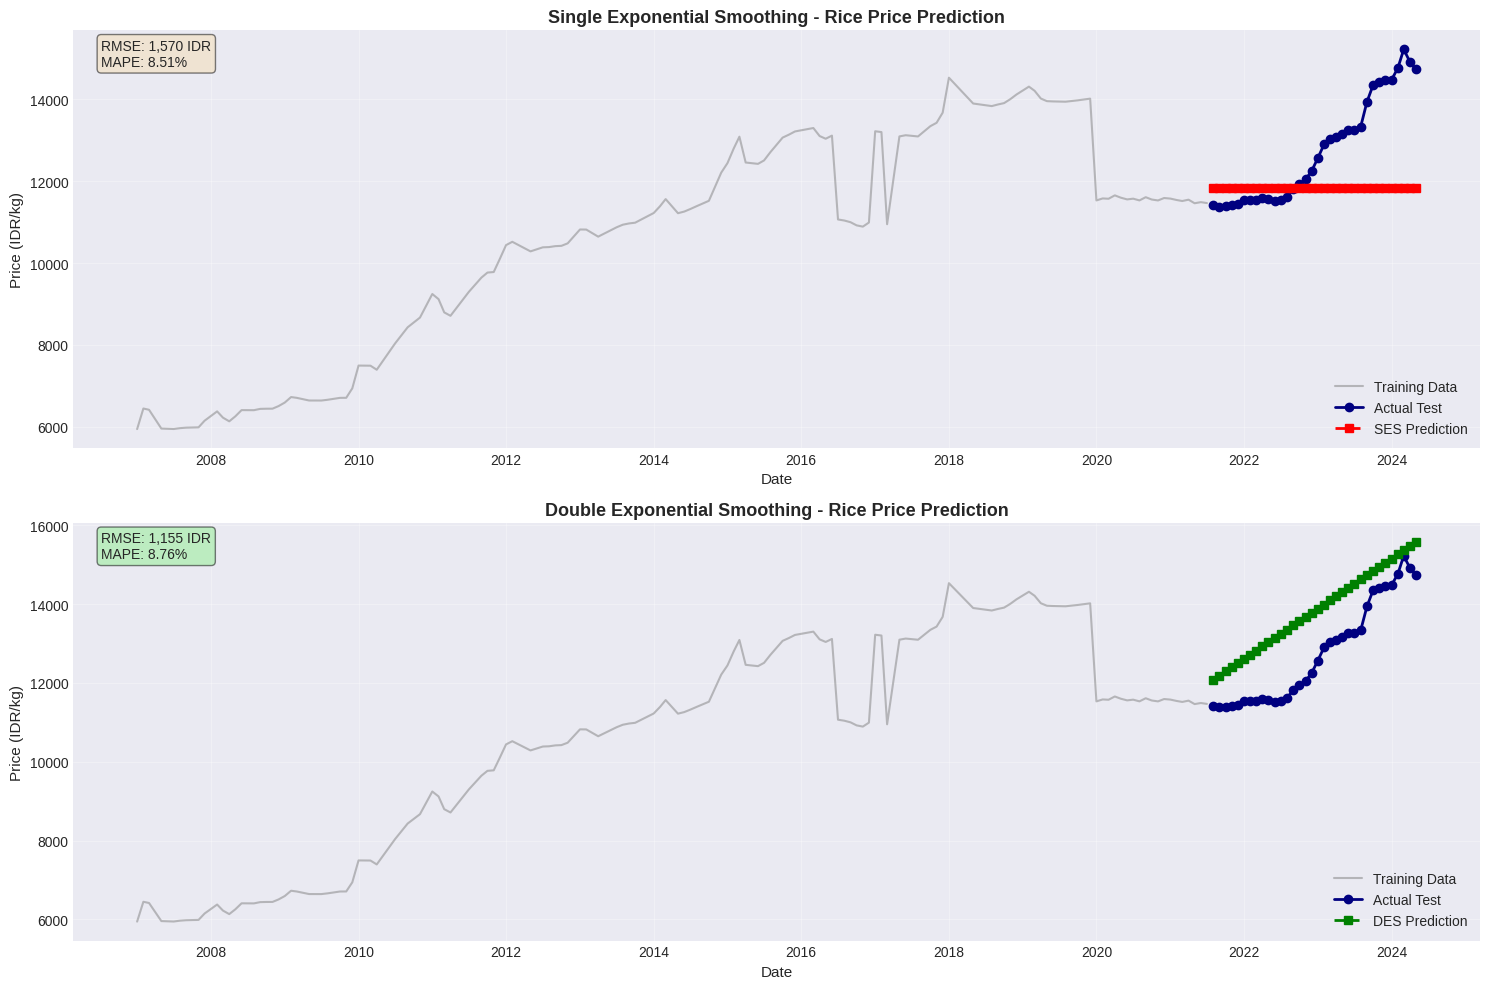

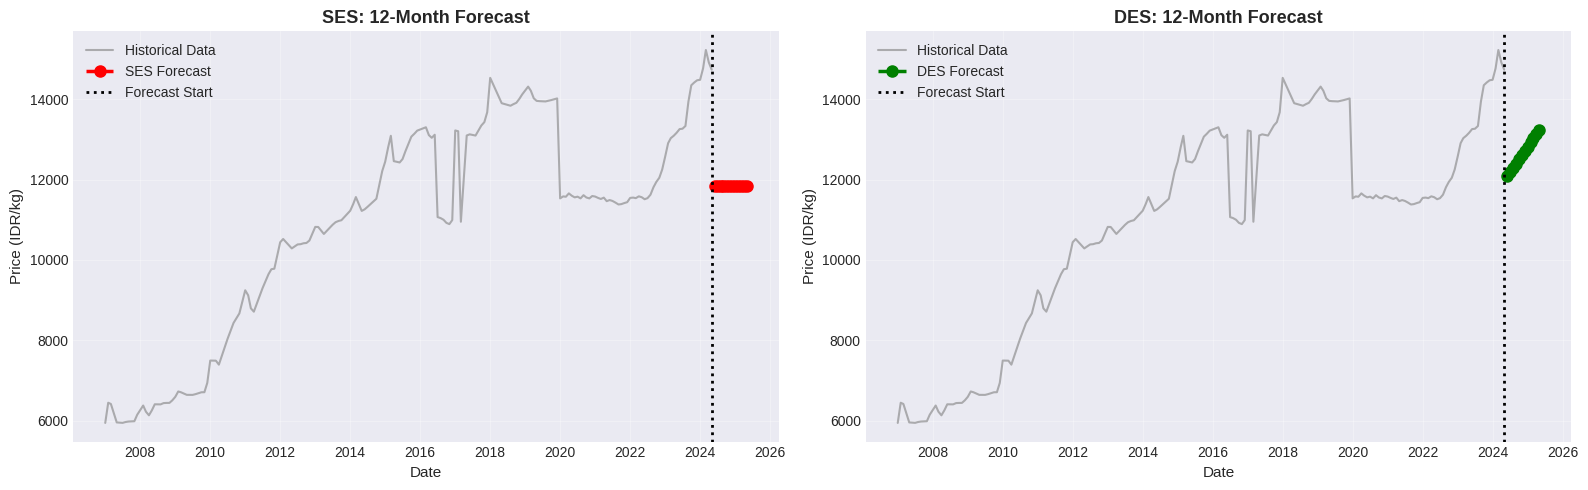

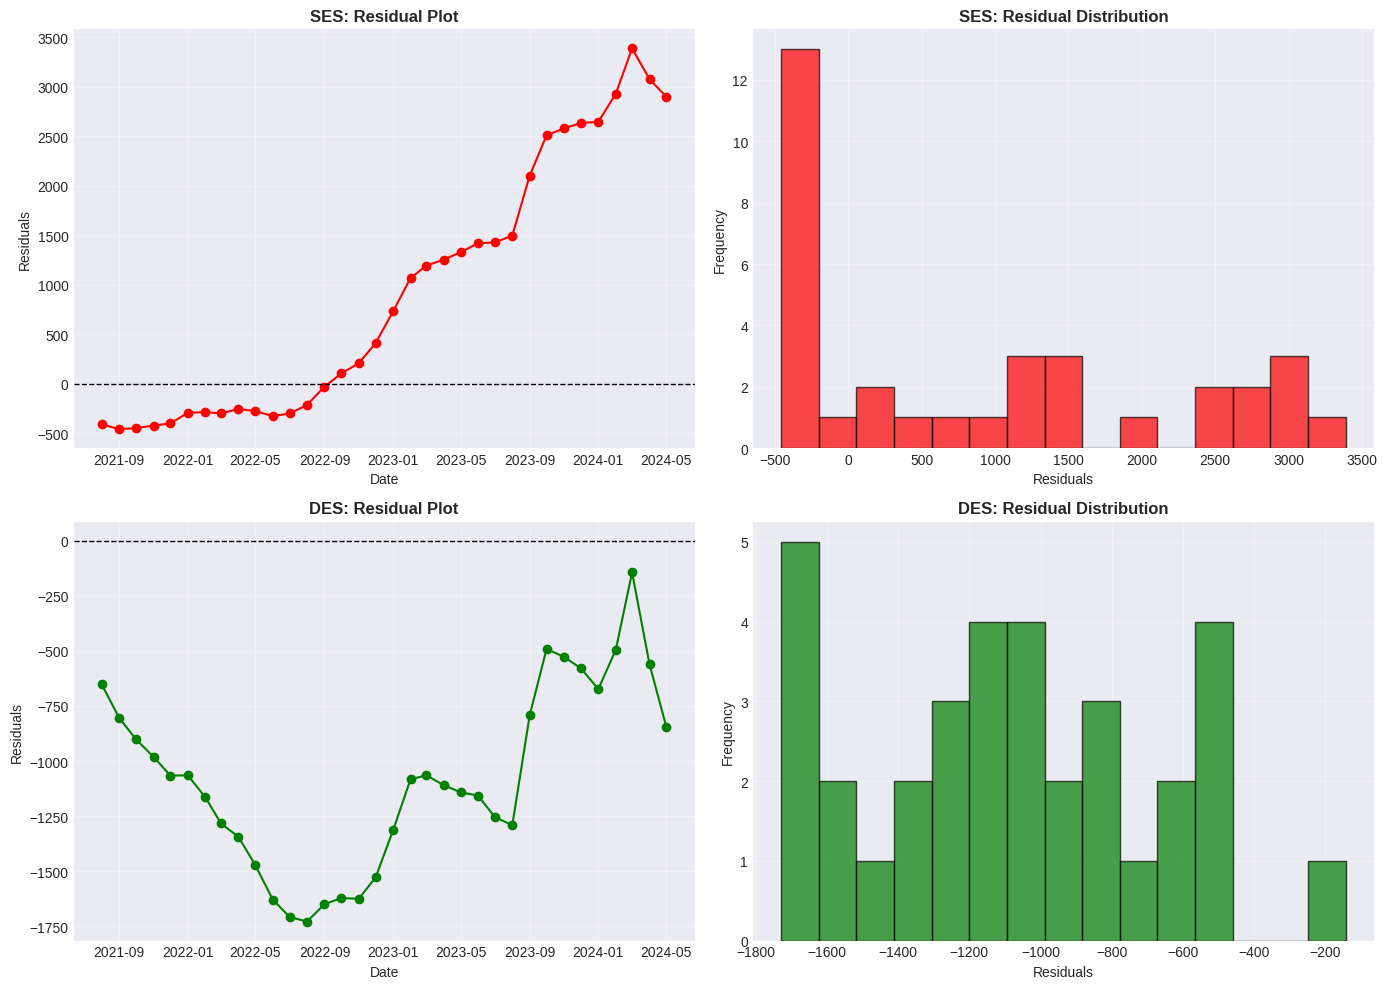

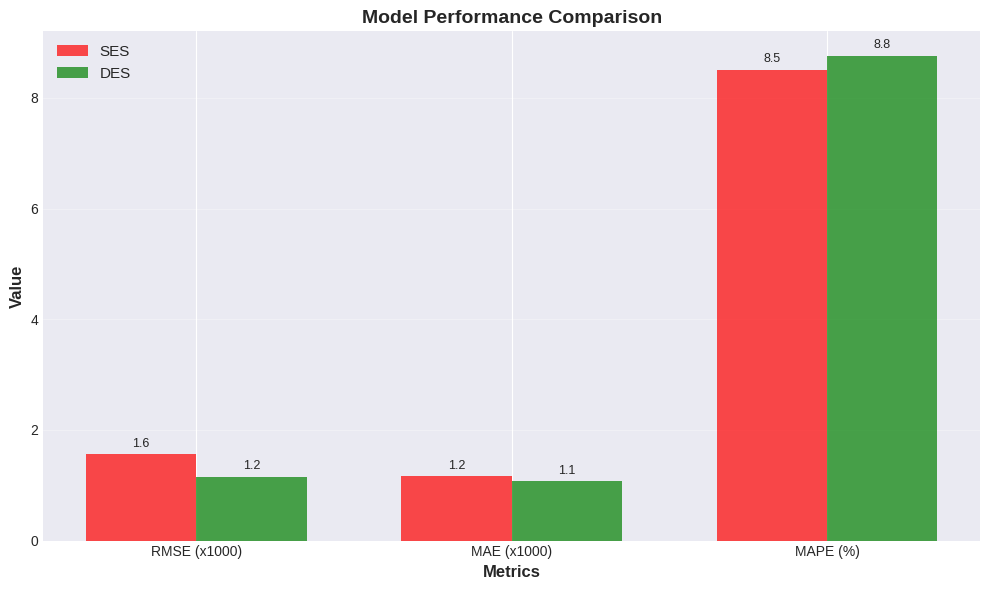

In [30]:
# Plot 1: Perbandingan Prediksi vs Aktual untuk Testing Data
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# SES
axes[0].plot(train.index, train.values, label='Training Data', color='gray', alpha=0.5)
axes[0].plot(test.index, test.values, label='Actual Test', color='navy', linewidth=2, marker='o')
axes[0].plot(test.index, ses_pred_test.values, label='SES Prediction',
             color='red', linewidth=2, linestyle='--', marker='s')
axes[0].set_title(f'Single Exponential Smoothing - {commodity_name} Price Prediction',
                  fontsize=13, fontweight='bold')
axes[0].set_xlabel('Date', fontsize=11)
axes[0].set_ylabel('Price (IDR/kg)', fontsize=11)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)
axes[0].text(0.02, 0.98, f'RMSE: {ses_rmse:,.0f} IDR\nMAPE: {ses_mape:.2f}%',
             transform=axes[0].transAxes, fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# DES
axes[1].plot(train.index, train.values, label='Training Data', color='gray', alpha=0.5)
axes[1].plot(test.index, test.values, label='Actual Test', color='navy', linewidth=2, marker='o')
axes[1].plot(test.index, des_pred_test.values, label='DES Prediction',
             color='green', linewidth=2, linestyle='--', marker='s')
axes[1].set_title(f'Double Exponential Smoothing - {commodity_name} Price Prediction',
                  fontsize=13, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=11)
axes[1].set_ylabel('Price (IDR/kg)', fontsize=11)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)
axes[1].text(0.02, 0.98, f'RMSE: {des_rmse:,.0f} IDR\nMAPE: {des_mape:.2f}%',
             transform=axes[1].transAxes, fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

plt.tight_layout()
plt.show()

# Plot 2: Forecast 12 bulan ke depan
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Create future dates
future_dates = pd.date_range(start=test.index[-1] + pd.DateOffset(months=1),
                              periods=12, freq='MS')

# SES Forecast
axes[0].plot(df_rice_monthly.index, df_rice_monthly.values, label='Historical Data',
             color='gray', alpha=0.6, linewidth=1.5)
axes[0].plot(future_dates, ses_forecast.values, label='SES Forecast',
             color='red', linewidth=2.5, marker='o', markersize=8, linestyle='--')
axes[0].axvline(x=test.index[-1], color='black', linestyle=':', linewidth=2,
                label='Forecast Start')
axes[0].set_title('SES: 12-Month Forecast', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Date', fontsize=11)
axes[0].set_ylabel('Price (IDR/kg)', fontsize=11)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# DES Forecast
axes[1].plot(df_rice_monthly.index, df_rice_monthly.values, label='Historical Data',
             color='gray', alpha=0.6, linewidth=1.5)
axes[1].plot(future_dates, des_forecast.values, label='DES Forecast',
             color='green', linewidth=2.5, marker='o', markersize=8, linestyle='--')
axes[1].axvline(x=test.index[-1], color='black', linestyle=':', linewidth=2,
                label='Forecast Start')
axes[1].set_title('DES: 12-Month Forecast', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=11)
axes[1].set_ylabel('Price (IDR/kg)', fontsize=11)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Plot 3: Residual Analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# SES Residuals
ses_residuals = test.values - ses_pred_test.values

axes[0, 0].plot(test.index, ses_residuals, color='red', marker='o')
axes[0, 0].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[0, 0].set_title('SES: Residual Plot', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(ses_residuals, bins=15, color='red', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('SES: Residual Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Residuals')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)

# DES Residuals
des_residuals = test.values - des_pred_test.values

axes[1, 0].plot(test.index, des_residuals, color='green', marker='o')
axes[1, 0].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1, 0].set_title('DES: Residual Plot', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(des_residuals, bins=15, color='green', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('DES: Residual Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Plot 4: Comparison Bar Chart
fig, ax = plt.subplots(figsize=(10, 6))

metrics = ['RMSE', 'MAE', 'MAPE']
ses_values = [ses_rmse/1000, ses_mae/1000, ses_mape]
des_values = [des_rmse/1000, des_mae/1000, des_mape]

x = np.arange(len(metrics))
width = 0.35

bars1 = ax.bar(x - width/2, ses_values, width, label='SES', color='red', alpha=0.7)
bars2 = ax.bar(x + width/2, des_values, width, label='DES', color='green', alpha=0.7)

ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Value', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(['RMSE (x1000)', 'MAE (x1000)', 'MAPE (%)'])
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# BAGIAN 8: INTERPRETASI DAN KESIMPULAN

In [32]:

print("\n\n" + "="*70)
print("INTERPRETASI HASIL")
print("="*70)

print(f"""
📌 SINGLE EXPONENTIAL SMOOTHING (SES):
   • Parameter α = {best_alpha_ses:.2f}
   • RMSE = {ses_rmse:,.2f} IDR
   • MAPE = {ses_mape:.2f}%

   Interpretasi:
   - SES cocok untuk data tanpa trend atau seasonal pattern yang kuat
   - Alpha {best_alpha_ses:.2f} menunjukkan bobot {'tinggi' if best_alpha_ses > 0.5 else 'rendah'} pada observasi terbaru
   - MAPE {ses_mape:.2f}% menunjukkan akurasi {'sangat baik' if ses_mape < 10 else 'baik' if ses_mape < 20 else 'cukup'}

📌 DOUBLE EXPONENTIAL SMOOTHING (DES):
   • Parameter α = {best_alpha_des:.2f}, β = {best_beta_des:.2f}
   • RMSE = {des_rmse:,.2f} IDR
   • MAPE = {des_mape:.2f}%

   Interpretasi:
   - DES dapat menangkap trend dalam data
   - Beta {best_beta_des:.2f} mengontrol responsivitas terhadap perubahan trend
   - {'Lebih akurat' if des_rmse < ses_rmse else 'Kurang akurat'} dibanding SES untuk data ini

 KESIMPULAN:
   • Model terbaik: {best_model} (RMSE lebih rendah)
   • {'DES lebih baik karena data memiliki trend' if des_rmse < ses_rmse else 'SES lebih baik karena data relatif stabil'}
   • Kedua model dapat digunakan untuk forecasting harga {commodity_name}
   • Forecast 12 bulan menunjukkan {'kenaikan' if des_forecast.iloc[-1] > test.iloc[-1] else 'penurunan'} harga
""")

print("="*70)
print("ANALISIS SELESAI ")
print("="*70)



INTERPRETASI HASIL

📌 SINGLE EXPONENTIAL SMOOTHING (SES):
   • Parameter α = 0.10
   • RMSE = 1,569.51 IDR
   • MAPE = 8.51%
   
   Interpretasi:
   - SES cocok untuk data tanpa trend atau seasonal pattern yang kuat
   - Alpha 0.10 menunjukkan bobot rendah pada observasi terbaru
   - MAPE 8.51% menunjukkan akurasi sangat baik
   
📌 DOUBLE EXPONENTIAL SMOOTHING (DES):
   • Parameter α = 0.10, β = 0.90
   • RMSE = 1,155.12 IDR
   • MAPE = 8.76%
   
   Interpretasi:
   - DES dapat menangkap trend dalam data
   - Beta 0.90 mengontrol responsivitas terhadap perubahan trend
   - Lebih akurat dibanding SES untuk data ini
   
 KESIMPULAN:
   • Model terbaik: DES (RMSE lebih rendah)
   • DES lebih baik karena data memiliki trend
   • Kedua model dapat digunakan untuk forecasting harga Rice
   • Forecast 12 bulan menunjukkan penurunan harga

ANALISIS SELESAI 


# Export hasil ke Excel

In [34]:
print("\n Menyimpan hasil ke Excel...")

with pd.ExcelWriter('hasil_analisis_exponential_smoothing.xlsx', engine='openpyxl') as writer:
    # Sheet 1: Data original (monthly aggregated)
    df_rice_monthly_df = pd.DataFrame({'Date': df_rice_monthly.index, 'Price': df_rice_monthly.values})
    df_rice_monthly_df.to_excel(writer, sheet_name='Data_Original', index=False)

    # Sheet 2: Hasil prediksi
    results = pd.DataFrame({
        'Date': test.index,
        'Actual': test.values,
        'SES_Prediction': ses_pred_test.values,
        'DES_Prediction': des_pred_test.values,
        'SES_Residual': ses_residuals,
        'DES_Residual': des_residuals
    })
    results.to_excel(writer, sheet_name='Predictions', index=False)

    # Sheet 3: Metrics comparison
    comparison_df.to_excel(writer, sheet_name='Model_Comparison', index=False)

    # Sheet 4: Forecast
    forecast_df = pd.DataFrame({
        'Month': range(1, 13),
        'Date': future_dates,
        'SES_Forecast': ses_forecast.values,
        'DES_Forecast': des_forecast.values
    })
    forecast_df.to_excel(writer, sheet_name='12_Month_Forecast', index=False)

print(" File tersimpan: hasil_analisis_exponential_smoothing.xlsx")
print("\n Selesai! Semua analisis telah selesai dilakukan.")


 Menyimpan hasil ke Excel...
 File tersimpan: hasil_analisis_exponential_smoothing.xlsx

 Selesai! Semua analisis telah selesai dilakukan.
